## PREAMBLE

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score

## DATA PREPROCESSING

## DATA

In [78]:
df = pd.read_csv("Invistico_Airline - Invistico_Airline.csv")

In [79]:
df.tail()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,3,3,3,3,4,5,5,5,3,3,3,185,186.0


In [80]:
df.shape[0]  #total dataset input count

129880

In [81]:
df.shape[1]  #total number of features (including target variable)

23

1. To check for total null values

In [82]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [83]:
""" to eliminate the data where the single null value occurs """
df_notnull = df[df['Arrival Delay in Minutes'].notna()]



In [84]:
df_notnull.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [85]:
df = df_notnull

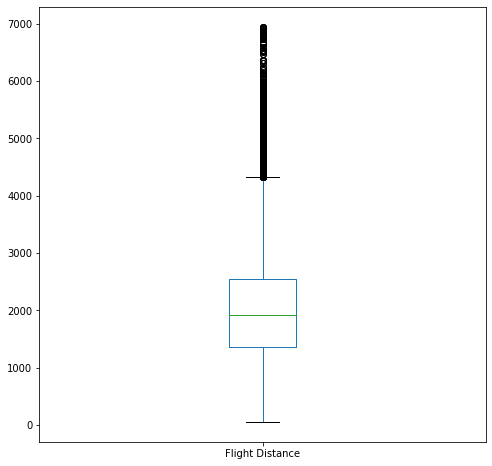

In [86]:
plt.figure(figsize=(8, 8))
df["Flight Distance"].plot.box()

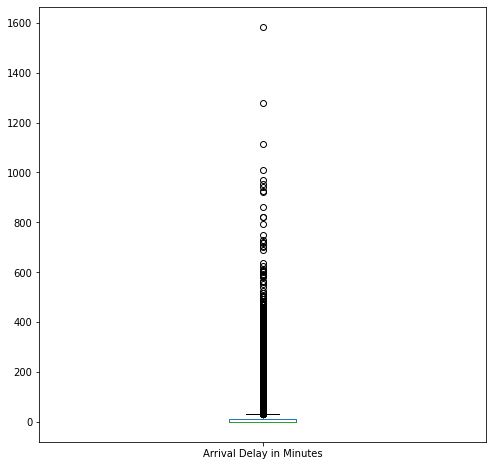

In [87]:
plt.figure(figsize=(8, 8))
df['Arrival Delay in Minutes'].plot.box()

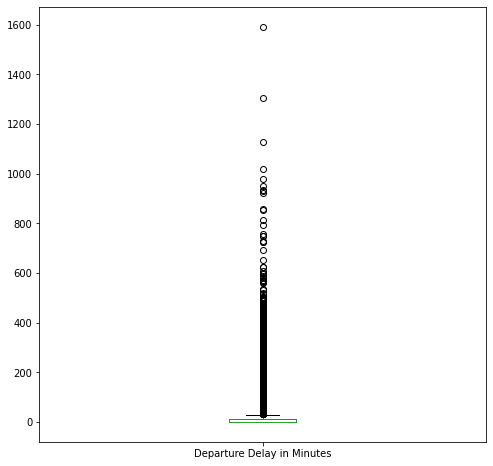

In [88]:
plt.figure(figsize=(8, 8))
df['Departure Delay in Minutes'].plot.box()

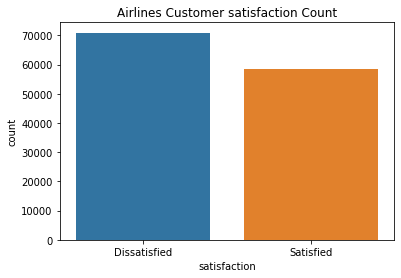

In [89]:
ax = sns.countplot(x='satisfaction',data = df)
plt.title('Airlines Customer satisfaction Count')
plt.xticks([0,1],['Dissatisfied',"Satisfied"])
plt.show()

we see that the number of satisfied and dissatisfied customers are almost equal.

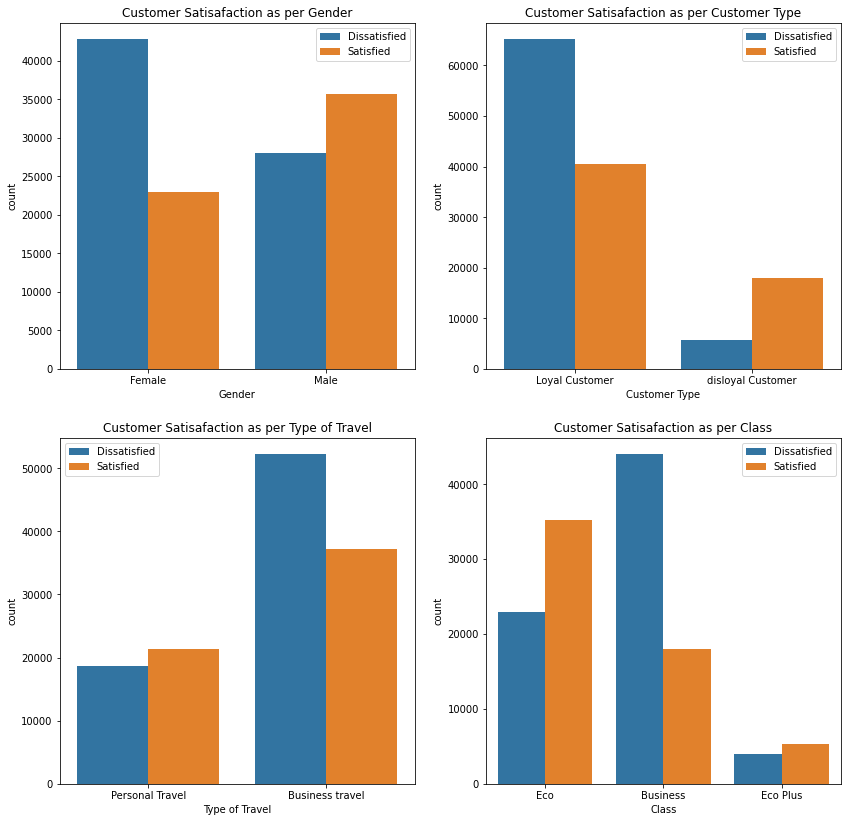

In [90]:
fig,axs = plt.subplots(2,2,figsize=(14, 14))
cols=['Gender', 'Customer Type', 'Type of Travel', 'Class']
c=0
for i in range(2):
  for j in range(2):
    sns.countplot(data=df,x=cols[c],hue='satisfaction',ax=axs[i][j])
    axs[i][j].set_title('Customer Satisafaction as per {}'.format(cols[c]))
    axs[i][j].legend(['Dissatisfied',"Satisfied"])
    c+=1

satisfaction
dissatisfied    AxesSubplot(0.125,0.125;0.775x0.755)
satisfied       AxesSubplot(0.125,0.125;0.775x0.755)
Name: Food and drink, dtype: object

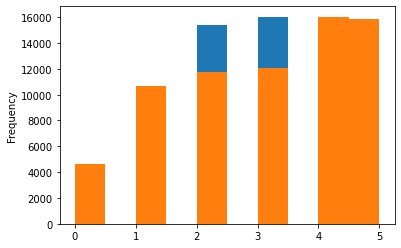

In [91]:

df.groupby("satisfaction")["Food and drink"].plot(kind='hist')

satisfaction
dissatisfied    AxesSubplot(0.125,0.125;0.775x0.755)
satisfied       AxesSubplot(0.125,0.125;0.775x0.755)
Name: Seat comfort, dtype: object

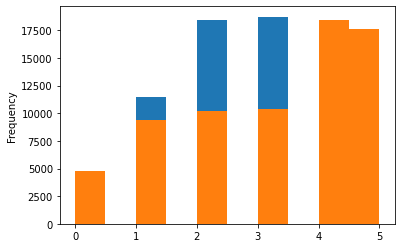

In [92]:
df.groupby("satisfaction")["Seat comfort"].plot(kind='hist')

## HANDLING CATEGORICAL VALUES

In [93]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1981.008974,2.838586,2.990277,2.852024,2.990377,3.249160,3.383745,3.519967,3.472171,3.465143,3.486118,3.695460,3.340729,3.705886,3.352545,14.643385,15.091129
std,15.117597,1026.884131,1.392873,1.527183,1.443587,1.305917,1.318765,1.345959,1.306326,1.305573,1.270755,1.292079,1.156487,1.260561,1.151683,1.298624,37.932867,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [94]:
df.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [95]:
d = dict(df.dtypes)
d


{'Age': dtype('int64'),
 'Arrival Delay in Minutes': dtype('float64'),
 'Baggage handling': dtype('int64'),
 'Checkin service': dtype('int64'),
 'Class': dtype('O'),
 'Cleanliness': dtype('int64'),
 'Customer Type': dtype('O'),
 'Departure Delay in Minutes': dtype('int64'),
 'Departure/Arrival time convenient': dtype('int64'),
 'Ease of Online booking': dtype('int64'),
 'Flight Distance': dtype('int64'),
 'Food and drink': dtype('int64'),
 'Gate location': dtype('int64'),
 'Gender': dtype('O'),
 'Inflight entertainment': dtype('int64'),
 'Inflight wifi service': dtype('int64'),
 'Leg room service': dtype('int64'),
 'On-board service': dtype('int64'),
 'Online boarding': dtype('int64'),
 'Online support': dtype('int64'),
 'Seat comfort': dtype('int64'),
 'Type of Travel': dtype('O'),
 'satisfaction': dtype('O')}

In [96]:
object_list = [ i for i in d if d[i]=='object']
object_list

['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

now getting one hot encoded values

In [97]:
df_dummies = pd.get_dummies(df[object_list], drop_first=True)
df_dummies.head(10)

,satisfaction_satisfied,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1,0,0,1,1,0
1,1,1,0,1,0,0
2,1,0,0,1,1,0
3,1,0,0,1,1,0
4,1,0,0,1,1,0
5,1,1,0,1,1,0
6,1,0,0,1,1,0
7,1,1,0,1,1,0
8,1,0,0,1,0,0
9,1,1,0,1,1,0


here:<br>
  satisfied represents 1<br>
  unsatisfied represents 0<br>
also;<br>
  male is represnted by 1<br>
  female is represented by 0<br>
also;<br>
  loyal customer is 0<br>
  disloyal customer is 1<br>
also;<br>
  personaltravel type is given by 1<br>
  business travel is given by 0<br>


In [98]:
df['satisfaction']= df_dummies['satisfaction_satisfied']
df['Gender'] = df_dummies['Gender_Male']
df['Type of Travel'] = df_dummies['Type of Travel_Personal Travel']
df['Customer Type'] = df_dummies['Customer Type_disloyal Customer']
df['Class_Eco']= df_dummies['Class_Eco']
df['Class_Eco Plus'] = df_dummies['Class_Eco Plus']

In [99]:
df.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Eco,Class_Eco Plus
0,1,0,0,65,1,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,1,0
1,1,1,0,47,1,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,0,0
2,1,0,0,15,1,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,1,0
3,1,0,0,60,1,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,1,0
4,1,0,0,70,1,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,1,0
5,1,1,0,30,1,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0,1,0
6,1,0,0,66,1,Eco,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0,1,0
7,1,1,0,10,1,Eco,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0,1,0
8,1,0,0,56,1,Business,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0,0,0
9,1,1,0,22,1,Eco,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0,1,0


In [100]:
df = df.drop('Class',axis = 1)

In [101]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Eco,Class_Eco Plus
0,1,0,0,65,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,1,0
1,1,1,0,47,1,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,0,0
2,1,0,0,15,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,1,0
3,1,0,0,60,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,1,0
4,1,0,0,70,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,1,0


## NORMALIZING THE DATA

In [102]:
scaler= MinMaxScaler()

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [104]:
columns = df.columns
columns= columns.drop('satisfaction')
columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
       'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'Online support', 'Ease of Online booking', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Cleanliness', 'Online boarding', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

In [105]:
data = df

In [106]:
data[columns] = scaler.fit_transform(df[columns])

In [107]:
data.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Eco,Class_Eco Plus
0,1,-0.985288,-0.473495,1.691495,1.494583,-1.671090,-2.037943,-1.958042,-1.975658,-0.758380,-0.947223,0.457857,-1.163548,-0.361660,-0.366038,-2.698079,-0.601358,1.316301,-0.612919,-1.041526,-0.386036,-0.392329,1.108170,-0.279458
1,1,1.014931,-0.473495,0.500825,1.494583,0.470348,-2.037943,-1.958042,-1.975658,0.007368,-2.463800,-1.028077,-1.163548,-0.361660,0.420898,0.397718,0.263333,-1.063601,-0.612919,-1.041526,7.786328,7.536854,-0.902389,-0.279458
2,1,-0.985288,-0.473495,-1.615922,1.494583,0.152882,-2.037943,-1.958042,-1.975658,0.007368,-0.947223,-2.514012,-1.163548,-1.127610,-0.366038,-0.376231,0.263333,0.523000,0.255379,-1.041526,-0.386036,-0.392329,1.108170,-0.279458
3,1,-0.985288,-0.473495,1.360753,1.494583,-1.322461,-2.037943,-1.958042,-1.975658,0.007368,-0.188935,0.457857,-0.398040,-1.893560,-1.939912,-2.698079,-2.330739,0.523000,-2.349514,-0.271477,-0.386036,-0.392329,1.108170,-0.279458
4,1,-0.985288,-0.473495,2.022237,1.494583,-1.584420,-2.037943,-1.958042,-1.975658,0.007368,0.569353,-0.285110,0.367469,-1.127610,-1.152975,-2.698079,-1.466048,0.523000,-1.481216,1.268621,-0.386036,-0.392329,1.108170,-0.279458
5,1,1.014931,-0.473495,-0.623697,1.494583,-0.084731,-2.037943,-1.958042,-1.975658,0.007368,-0.947223,-2.514012,-1.163548,-1.127610,1.207835,0.397718,1.128024,1.316301,0.255379,-1.041526,-0.386036,-0.392329,1.108170,-0.279458
6,1,-0.985288,-0.473495,1.757643,1.494583,-1.708095,-2.037943,-1.958042,-1.975658,0.007368,-0.947223,1.200825,1.132978,1.170241,1.207835,-2.698079,1.128024,1.316301,1.123676,-0.271477,0.062126,-0.002369,1.108170,-0.279458
7,1,1.014931,-0.473495,-1.946664,1.494583,-0.164585,-2.037943,-1.958042,-1.975658,0.007368,-0.947223,-2.514012,-1.163548,-1.127610,-0.366038,-0.376231,0.263333,1.316301,0.255379,-1.041526,-0.386036,-0.392329,1.108170,-0.279458
8,1,-0.985288,-0.473495,1.096160,1.494583,-1.858064,-2.037943,-1.958042,-1.975658,0.007368,1.327641,-0.285110,1.132978,0.404291,0.420898,-2.698079,-2.330739,1.316301,0.255379,0.498572,-0.386036,-0.392329,-0.902389,-0.279458
9,1,1.014931,-0.473495,-1.152884,1.494583,-0.413884,-2.037943,-1.958042,-1.975658,0.007368,-0.947223,-2.514012,-1.163548,-1.127610,-1.152975,0.397718,1.128024,-0.270301,0.255379,-1.041526,0.404838,0.283601,1.108170,-0.279458


## CROSS VALIDATION

In [108]:
from sklearn.model_selection import StratifiedKFold

In [109]:
from sklearn.model_selection import StratifiedKFold

data["kfold"] = -1
data = data.sample(frac=1).reset_index(drop = True)

y = data.satisfaction.values

kf = StratifiedKFold(n_splits=10)

for f, (t_, v_) in enumerate(kf.split(X = data, y=y)):
  data.loc[v_,'kfold'] = f

In [110]:
data.tail(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Eco,Class_Eco Plus,kfold
129477,0,-0.985288,-0.473495,0.831567,-0.669083,-1.046869,-0.602057,-1.303239,-0.590215,-0.758380,-1.705512,-0.285110,0.367469,-1.127610,-1.152975,-1.150180,-1.466048,0.523000,-1.481216,-1.041526,-0.386036,-0.392329,1.108170,-0.279458,9
129478,1,-0.985288,-0.473495,-0.623697,-0.669083,0.670956,-1.320000,-1.303239,-1.282937,-1.524128,1.327641,1.200825,1.132978,1.170241,1.207835,1.171668,0.263333,1.316301,0.255379,1.268621,-0.386036,-0.392329,-0.902389,-0.279458,9
129479,1,1.014931,2.111957,-1.020587,-0.669083,-0.354480,0.833829,-1.958042,0.795228,-0.758380,-0.947223,0.457857,-1.163548,-1.127610,1.207835,-0.376231,1.128024,-0.270301,1.123676,-1.041526,0.141214,0.439585,-0.902389,-0.279458,9
129480,1,1.014931,-0.473495,1.228457,-0.669083,0.498589,0.833829,0.661169,0.795228,0.773117,1.327641,1.200825,1.132978,1.170241,1.207835,0.397718,0.263333,1.316301,0.255379,1.268621,-0.359673,-0.392329,-0.902389,-0.279458,9
129481,1,-0.985288,-0.473495,1.294605,-0.669083,-1.685697,1.551772,1.315972,1.487949,1.538865,-0.947223,-1.771045,-1.929057,0.404291,0.420898,0.397718,0.263333,-0.270301,0.255379,1.268621,-0.386036,-0.392329,-0.902389,-0.279458,9
129482,1,-0.985288,-0.473495,0.037786,-0.669083,-0.477182,-1.320000,-1.303239,-1.282937,-1.524128,1.327641,0.457857,1.132978,1.170241,1.207835,1.171668,1.128024,1.316301,1.123676,0.498572,-0.386036,-0.392329,-0.902389,-0.279458,9
129483,0,1.014931,-0.473495,-0.623697,-0.669083,3.261326,0.115886,1.315972,1.487949,1.538865,-0.188935,-0.285110,-0.398040,0.404291,0.420898,0.397718,0.263333,-0.270301,-1.481216,-0.271477,3.594696,3.429277,-0.902389,-0.279458,9
129484,1,-0.985288,-0.473495,0.765418,-0.669083,-1.829823,1.551772,1.315972,1.487949,1.538865,0.569353,0.457857,1.132978,1.170241,1.207835,1.171668,0.263333,1.316301,1.123676,-0.271477,-0.386036,-0.392329,-0.902389,-0.279458,9
129485,0,-0.985288,-0.473495,-0.491400,-0.669083,0.477165,-0.602057,0.006367,0.102506,0.007368,-0.947223,-1.028077,-1.163548,-1.127610,-1.939912,0.397718,0.263333,-1.856902,-0.612919,-1.041526,-0.386036,-0.392329,1.108170,-0.279458,9
129486,1,-0.985288,-0.473495,-1.748219,1.494583,-0.861843,-2.037943,1.315972,-1.975658,0.773117,1.327641,-2.514012,-0.398040,1.170241,1.207835,-0.376231,0.263333,1.316301,0.255379,1.268621,-0.386036,-0.392329,1.108170,-0.279458,9


# Training, modelling and Validating

In [111]:
from sklearn import preprocessing

In [112]:
def run(df, fold, model,columns):

  features = columns
  #features = feature_selection_(df.iloc[:,:-2].values,df.Class)
  

  """getting train and validation data. keeping the fold value in validation set 
  and remaining in training set"""
  df_train = df[df.kfold != fold].reset_index(drop = True)
  df_valid = df[df.kfold == fold].reset_index(drop = True)

  """ training data"""
  X_train = df_train[features]
  X_valid = df_valid[features]

  """ target class"""
  y_train = df_train['satisfaction']
  y_test = df_valid['satisfaction']

  """model fitting"""
  model.fit(X_train, y_train)

  """ predicting values using trained model"""
  y_pred = model.predict(X_valid)

  """calculating auc score for classification problem"""
  acc = accuracy_score(y_test, y_pred)
  

  print("Fold={} accuracy ={}\n".format(fold,acc))
  print('Confusion Matrix is\n\n',confusion_matrix(y_test,y_pred))
  


## MODELLING

### i. LOGISTIC REGRESSION

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
log_reg1=LogisticRegression(max_iter=2500)

In [115]:
for fold in range(10):
  run(data, fold, log_reg1,columns)

Fold=0 accuracy =0.8335006564213453

Confusion Matrix is

 [[4762 1098]
 [1058 6031]]
Fold=1 accuracy =0.8320333616495482

Confusion Matrix is

 [[4788 1072]
 [1103 5986]]
Fold=2 accuracy =0.8365896980461812

Confusion Matrix is

 [[4803 1058]
 [1058 6030]]
Fold=3 accuracy =0.8341184647463125

Confusion Matrix is

 [[4813 1048]
 [1100 5988]]
Fold=4 accuracy =0.8387520271835663

Confusion Matrix is

 [[4826 1035]
 [1053 6035]]
Fold=5 accuracy =0.8370530542899065

Confusion Matrix is

 [[4808 1053]
 [1057 6031]]
Fold=6 accuracy =0.8330373001776199

Confusion Matrix is

 [[4781 1080]
 [1082 6006]]
Fold=7 accuracy =0.8332561013283905

Confusion Matrix is

 [[4755 1105]
 [1054 6034]]
Fold=8 accuracy =0.8337967253629904

Confusion Matrix is

 [[4744 1116]
 [1036 6052]]
Fold=9 accuracy =0.8435279579857893

Confusion Matrix is

 [[4816 1044]
 [ 982 6106]]


### ii. K-NEIGHBOURS 

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
for k in range(10,15):
  knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2, n_jobs=-1) 
  print("k=",k)
  for fold in range(1):
    run(data, fold, knn,columns)

k= 10
Fold=0 accuracy =0.9267897134913893

Confusion Matrix is

 [[5610  250]
 [ 698 6391]]
k= 11
Fold=0 accuracy =0.9281025561819446

Confusion Matrix is

 [[5537  323]
 [ 608 6481]]
k= 12
Fold=0 accuracy =0.926249131207043

Confusion Matrix is

 [[5589  271]
 [ 684 6405]]
k= 13
Fold=0 accuracy =0.9273302957757356

Confusion Matrix is

 [[5529  331]
 [ 610 6479]]
k= 14
Fold=0 accuracy =0.9251679666383504

Confusion Matrix is

 [[5565  295]
 [ 674 6415]]


we see that we get a good accuracy score (92.4086%) when the number of nearest neighbours is 11.

### iii. DECISION TREES

In [118]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=25 ,max_leaf_nodes=1000)

In [120]:
for fold in range(10):
  run(data, fold, dtc,columns)

Fold=0 accuracy =0.9497258475557958

Confusion Matrix is

 [[5599  261]
 [ 390 6699]]
Fold=1 accuracy =0.9500347517182794

Confusion Matrix is

 [[5604  256]
 [ 391 6698]]
Fold=2 accuracy =0.9483357788246196

Confusion Matrix is

 [[5607  254]
 [ 415 6673]]
Fold=3 accuracy =0.9453239632404047

Confusion Matrix is

 [[5580  281]
 [ 427 6661]]
Fold=4 accuracy =0.9491852652714495

Confusion Matrix is

 [[5638  223]
 [ 435 6653]]
Fold=5 accuracy =0.945015059077921

Confusion Matrix is

 [[5604  257]
 [ 455 6633]]
Fold=6 accuracy =0.9447061549154375

Confusion Matrix is

 [[5608  253]
 [ 463 6625]]
Fold=7 accuracy =0.9452425084955205

Confusion Matrix is

 [[5604  256]
 [ 453 6635]]
Fold=8 accuracy =0.9463237565647205

Confusion Matrix is

 [[5601  259]
 [ 436 6652]]
Fold=9 accuracy =0.9481773246833488

Confusion Matrix is

 [[5593  267]
 [ 404 6684]]


### iv. RANDOM FORESTS

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rfc = RandomForestClassifier(n_estimators=40, criterion='entropy', max_depth=40,max_leaf_nodes=4100)

In [123]:
for fold in range(10):
  run(data, fold, rfc,columns)

Fold=0 accuracy =0.9568306432929183

Confusion Matrix is

 [[5620  240]
 [ 319 6770]]
Fold=1 accuracy =0.9572167734960229

Confusion Matrix is

 [[5627  233]
 [ 321 6768]]
Fold=2 accuracy =0.9576801297397483

Confusion Matrix is

 [[5637  224]
 [ 324 6764]]
Fold=3 accuracy =0.9521970808556646

Confusion Matrix is

 [[5629  232]
 [ 387 6701]]
Fold=4 accuracy =0.9554405745617423

Confusion Matrix is

 [[5634  227]
 [ 350 6738]]
Fold=5 accuracy =0.9557494787242258

Confusion Matrix is

 [[5626  235]
 [ 338 6750]]
Fold=6 accuracy =0.9562900610085721

Confusion Matrix is

 [[5640  221]
 [ 345 6743]]
Fold=7 accuracy =0.9555915971578622

Confusion Matrix is

 [[5625  235]
 [ 340 6748]]
Fold=8 accuracy =0.9562866852023478

Confusion Matrix is

 [[5628  232]
 [ 334 6754]]
Fold=9 accuracy =0.9601482854494903

Confusion Matrix is

 [[5662  198]
 [ 318 6770]]


## CONCLUSION

In the problem to classifiy customers review based on their travel experience, we have developed multiple classification models. <br>


1.   Logistic Regression: had an average accuracy score of 
2.   List item



## PLOT BOUNDARY

In [124]:
def plot_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Not Purchased', s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Purchased', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.xlabel('Age')
        plt.ylabel('Salary')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)